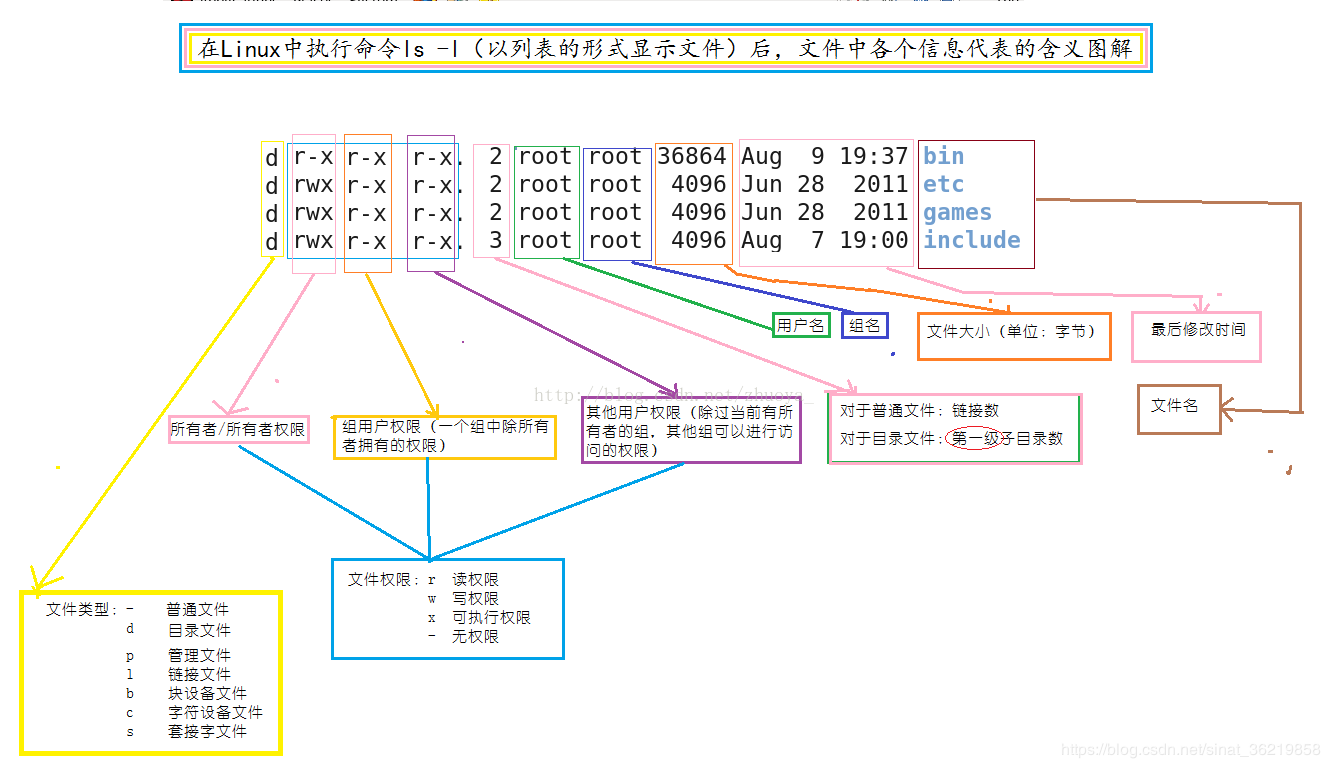

在linux下习惯使用ll、la等ls别名的童鞋到mac os可就郁闷了～～。其实只要在用户目录下建立一个脚本“.bash_profile”，并输入以下内容即可：
alias ll='ls -alF'

alias la='ls -A'

alias l='ls -CF'

然后

source .bash_profile



知识点总结：

1 .bash_profile文件是用户登陆终端的时候会自动执行的文件，一般此文件中会调用.bashrc（也就是在.bash_profile中有这么一行：source ~/.bashrc），当然，前提是这些文件都存在并且设置了，具体可以百度一下。

2 source命令用法：（没有测试，不过可以帮助我们理解一些东西）
source FileName
作用:在当前bash环境下读取并执行FileName中的命令。
注：该命令通常用命令“.”来替代。
如：source .bash_rc 与 . .bash_rc 是等效的。
注意：source命令与shell scripts的区别是，
source在当前bash环境下执行命令，而scripts是启动一个子shell来执行命令。这样如果把设置环境变量（或alias等等）的命令写进scripts中，就只会影响子shell,无法改变当前的BASH,所以通过文件（命令列）设置环境变量时，要用source 命令。
————————————————
版权声明：本文为CSDN博主「xiaogou56a」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/xiaogou56a/article/details/45112003

在每个cell的**开头**使用相关的魔法命令来声明你想使用的 kernel：

%%bash

%%HTML

%%python2

%%python3

%%ruby

%%perl

In [ ]:
 
pip list

In [ ]:
%%bash
 
p=`which pip3 ` 
#print ("\n")
more $p

# 1.用` `,（尖号）把命令括起来，然后赋值给变量
# dir=`pwd`
# 2.采用   变量=$(pwd)
# dir=$(pwd)


!pip3 install Pillow -i https://pypi.tuna.tsinghua.edu.cn/simple
    pip 安装到的路径是1，但是应该在2才有用
    1./usr/local/lib/python3.7/site-packages
    2./Library/Python/3.7/site-packages
    如何进行正确安装？
    
    --target /Library/Python/3.7/site-packages

[python3+pyzbar+Image 进行图片二维码识别](https://www.cnblogs.com/xushengming/p/9872061.html)

In [49]:
import pyzbar.pyzbar as pyzbar
from PIL import Image,ImageEnhance


image = "IMG_3135.jpg"


img = Image.open(image)

#img = ImageEnhance.Brightness(img).enhance(2.0)#增加亮度

#img = ImageEnhance.Sharpness(img).enhance(17.0)#锐利化

#img = ImageEnhance.Contrast(img).enhance(4.0)#增加对比度

#img = img.convert('L')#灰度化

# img.show()
biaoqian = ["MAC:","S/N:"]

barcodes = pyzbar.decode(img)

"""
print (barcodes)
[Decoded(data=b'00749CD5EF4A', type='CODE128', rect=Rect(left=142, top=386, width=714, height=35), polygon=[Point(x=142, y=399), Point(x=142, y=403), Point(x=143, y=417), Point(x=144, y=421), Point(x=856, y=420), Point(x=856, y=414), Point(x=855, y=386)]), Decoded(data=b'G1MQ7KN041437', type='CODE128', rect=Rect(left=127, top=207, width=770, height=37), polygon=[Point(x=127, y=207), Point(x=128, y=221), Point(x=130, y=243), Point(x=897, y=244), Point(x=897, y=234), Point(x=896, y=210)])]
"""
 


for barcode in barcodes:
    barcodeData = barcode.data.decode("utf-8")
    print(barcodeData)
    
for key,value in enumerate(biaoqian):
    print (value,barcodes[key].data.decode("utf-8"))

00749CD5EF4A
G1MQ7KN041437
MAC: 00749CD5EF4A
S/N: G1MQ7KN041437


In [29]:
!pip3 list
# drwxr-xr-x 
# 其中前三个表示文件拥有者的权限，中间三个表示文件所属组拥有的权限，最后三个表示其他用户拥有的权限。 

Package    Version
---------- -------
ExifRead   2.1.2  
Pillow     6.2.1  
pip        19.3.1 
setuptools 41.6.0 
wheel      0.33.6 


In [121]:

import exifread
import re


f = open("IMG_3135.jpg",'rb') 
imagetext = exifread.process_file(f)
t=imagetext["GPS GPSAltitude"]
type(t.values)
#t.values
# convert = lambda ratio: float(ratio.num)/float(ratio.den)
# alt = [convert(c) for c in t.values]      
# alt

list

In [147]:
#我们通过python3 去读取照片的信息  下面是我用python3写的代码

import exifread
import re

def latitude_and_longitude_convert_to_decimal_system(*arg):
    """
    经纬度转为小数, 作者尝试适用于iphone6、ipad2以上的拍照的照片，
    :param arg:
    :return: 十进制小数
    """
    return float(arg[0]) + ((float(arg[1]) + (float(arg[2].split('/')[0]) / float(arg[2].split('/')[-1]) / 60)) / 60)


def  imageread():
        GPS = {}
        date = ''
        f = open("IMG_3135.jpg",'rb')
        imagetext = exifread.process_file(f)
        
#         print (imagetext)
#         for key in imagetext:                           #打印键值对
#                 print(key,":",imagetext[key])
#         print('********************************************************\n********************************************************')
        for q in imagetext:                             #打印该图片的经纬度 以及拍摄的时间
                if q == "GPS GPSLongitude":
                        print("GPS经度 =", imagetext[q],imagetext['GPS GPSLongitudeRef'])
                      
                elif q =="GPS GPSLatitude":
                        print("GPS纬度 =",imagetext[q],imagetext['GPS GPSLatitudeRef'])
                elif q =="GPS GPSAltitude":
                         print("GPS海拔 =", imagetext[q] ,imagetext['GPS GPSAltitudeRef'])
                elif q =='Image DateTime':
                        print("拍摄时间 =",imagetext[q])
imageread()

拍摄时间 = 2019:12:02 10:19:12
GPS纬度 = [32, 23, 621/50] N
GPS经度 = [119, 25, 16] E
GPS海拔 = 104369/10458 0


In [133]:

convert = lambda ratio: float(ratio.num)/float(ratio.den)
alt = [convert(c) for c in imageread().values ]
alt

拍摄时间 = 2019:12:02 10:19:12
GPS纬度 = [32, 23, 621/50] E
GPS经度 = [119, 25, 16] N
GPS海拔 = 104369/10458 0


[9.97982405813731]

In [42]:
for k,y in enumerate(['1','rr','dkjf','df','jfkjdkfj']):
    print (k,y)


0 1
1 rr
2 dkjf
3 df
4 jfkjdkfj


In [100]:
t = str(104369) + "/" + str(10458) 
t

'104369/10458'

In [101]:
convert = lambda ratio: float(ratio.num)/float(ratio.den)
 alt = [convert(c) for c in t]

IndentationError: unexpected indent (<ipython-input-101-4c291b65dc77>, line 2)

In [64]:
a = lambda x: x**2
[a(c) for c in [3,4,5]]

[9, 16, 25]

In [142]:
def latitude_and_longitude_convert_to_decimal_system(*arg):
    """
    经纬度转为小数, 作者尝试适用于iphone6、ipad2以上的拍照的照片，
    :param arg:
    :return: 十进制小数
    """
    return float(arg[0]) + ((float(arg[1]) + (float(arg[2].split('/')[0]) / float(arg[2].split('/')[-1]) / 60)) / 60)
 
a = latitude_and_longitude_convert_to_decimal_system('32', '23', '621/50')
b = latitude_and_longitude_convert_to_decimal_system('119', '25', '16')
[a,b]

[32.386783333333334, 119.41694444444444]